## Análise histórica de emissões de carbono

### Análise Inicial dos dados

Fonte: [Our world in data](https://ourworldindata.org/explorers/co2?facet=none&Gas+or+Warming=CO%E2%82%82&Accounting=Territorial&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+country&Relative+to+world+total=false&country=CHN~USA~IND~GBR~OWID_WRL)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dados = pd.read_csv('dataset\\co2_emission_2017.csv') # Importando os dados

# Conjunto de dados atualizado:
dados = pd.read_csv('dataset\\annual_co2_emissions_2022.csv')

In [3]:
df = pd.DataFrame(dados) # Criando o DataFrame
df.head(10)

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
5,Afghanistan,AFG,1954,106256.0
6,Afghanistan,AFG,1955,153888.0
7,Afghanistan,AFG,1956,183200.0
8,Afghanistan,AFG,1957,293120.0
9,Afghanistan,AFG,1958,329760.0


In [4]:
# Renomeando Coluna para facilitar a digitação
df.rename(columns = {'Annual CO₂ emissions': 'Annual CO2 emissions (ton)'}, inplace = True)
df.head()

,Entity,Code,Year,Annual CO2 emissions (ton)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30308 entries, 0 to 30307
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      30308 non-null  object 
 1   Code                        24157 non-null  object 
 2   Year                        30308 non-null  int64  
 3   Annual CO2 emissions (ton)  30308 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 947.3+ KB


### Análise dados do Brasil

In [6]:
# Selecionando apenas os dados referentes ao Brasil
df_brazil = df[df['Entity'] == 'Brazil']
df_brazil.head()

,Entity,Code,Year,Annual CO2 emissions (ton)
4498,Brazil,BRA,1901,2103136.0
4499,Brazil,BRA,1902,2506176.0
4500,Brazil,BRA,1903,2440224.0
4501,Brazil,BRA,1904,2619760.0
4502,Brazil,BRA,1905,2799296.0


In [7]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 4498 to 4619
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      122 non-null    object 
 1   Code                        122 non-null    object 
 2   Year                        122 non-null    int64  
 3   Annual CO2 emissions (ton)  122 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB


In [8]:
df_brazil.describe(include = float)

,Annual CO2 emissions (ton)
count,1.220000e+02
mean,1.407933e+08
std,1.683780e+08
min,2.103136e+06
25%,5.533289e+06
50%,5.137465e+07
75%,2.325492e+08
max,5.579010e+08


In [9]:
df_brazil.reset_index(drop= True, inplace= True) # Resetando os índices
df_brazil

,Entity,Code,Year,Annual CO2 emissions (ton)
0,Brazil,BRA,1901,2103136.0
1,Brazil,BRA,1902,2506176.0
2,Brazil,BRA,1903,2440224.0
3,Brazil,BRA,1904,2619760.0
4,Brazil,BRA,1905,2799296.0
...,...,...,...,...
117,Brazil,BRA,2018,477998620.0
118,Brazil,BRA,2019,473464400.0
119,Brazil,BRA,2020,444504320.0
120,Brazil,BRA,2021,497206340.0


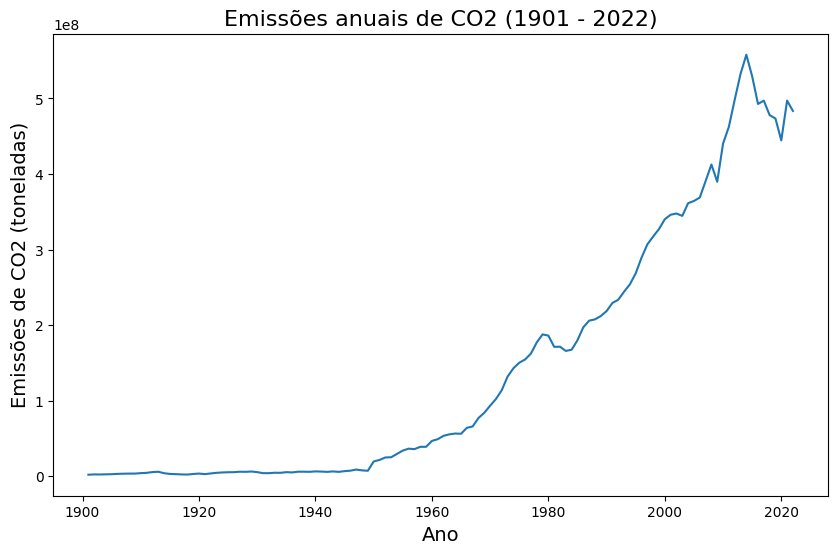

In [10]:
# Criando o gráfico de linha
plt.figure(figsize = (10, 6))
plt.plot(df_brazil['Year'], df_brazil['Annual CO2 emissions (ton)'])
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Emissões de CO2 (toneladas)', fontsize = 14)
plt.title('Emissões anuais de CO2 (1901 - 2022)', fontsize = 16)
plt.show()

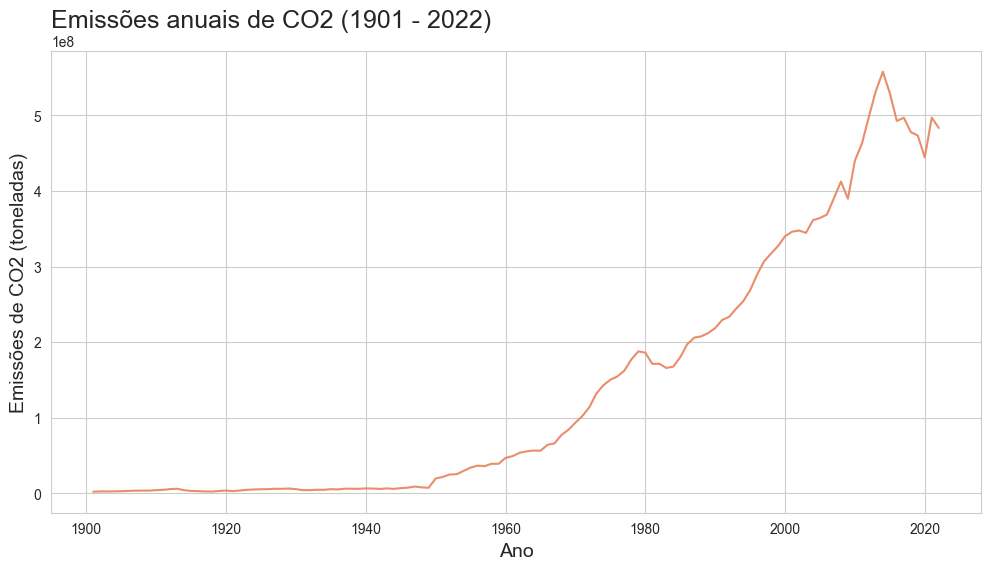

In [11]:
# Coloca a Paleta do gráfico
sns.set_palette('flare')
#Adiciona uma grid a imagem
sns.set_style('whitegrid')
# Mesmo gráfico no Seaborn
ax = sns.lineplot(x= 'Year', y= 'Annual CO2 emissions (ton)', data= df_brazil)
# Define o tamanho da imagem
ax.figure.set_size_inches(12, 6)
# Cria título e legendas
ax.set_title('Emissões anuais de CO2 (1901 - 2022)', loc= 'left', fontsize= 18)
ax.set_xlabel('Ano', fontsize= 14)
ax.set_ylabel('Emissões de CO2 (toneladas)', fontsize= 14)
# Retira texto acima da imagem
ax = ax



In [12]:
df_teste = df_brazil.copy()
df_teste.head()

,Entity,Code,Year,Annual CO2 emissions (ton)
0,Brazil,BRA,1901,2103136.0
1,Brazil,BRA,1902,2506176.0
2,Brazil,BRA,1903,2440224.0
3,Brazil,BRA,1904,2619760.0
4,Brazil,BRA,1905,2799296.0
